In [56]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vayuair/VayuAir.csv


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

#Read file
df=pd.read_csv("/kaggle/input/vayuair/VayuAir.csv")
df.head()



,Module_id,Response_ID,Satisfaction,Age,Gender,Customer type,Travel type,Ticket type,Flight distance,Departure delay in minutes,...,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
0,20461,27353,satisfied,29,Male,Loyal,Business,Business,697,0,...,3,5,3,2,2,2,5,4,5,2
1,39192,6970,satisfied,55,Female,Loyal,Business,Business,1501,0,...,5,2,5,5,3,5,2,5,5,3
2,82556,60407,neutral or dissatisfied,52,Male,Loyal,Personal,Economy,1476,1,...,5,3,3,2,2,2,4,3,5,2
3,55565,60678,satisfied,55,Male,Loyal,Business,Business,1728,6,...,5,4,5,5,3,5,4,5,5,5
4,92507,20042,neutral or dissatisfied,22,Female,Discontinued,Business,Business,607,90,...,4,4,3,4,4,4,4,2,3,4


In [58]:
df.shape

(11006, 25)

In [59]:
y = df['Satisfaction']
print(f'Percentage of dissatisfied: % {round(y.value_counts(normalize=True)[1]*100,2)} --> ({y.value_counts()[1]} customers)\nPercentage of satissfied: % {round(y.value_counts(normalize=True)[0]*100,2)} --> ({y.value_counts()[0]} customers)')

Percentage of dissatisfied: % 43.39 --> (4776 customers)
Percentage of satissfied: % 56.61 --> (6230 customers)


Almost 43.39% of people are dissatisfied and 56.61% sattisfied 
We need to predict disattisfied more accurately than predicting a satisfied wrong



In [60]:
#Descriptive staticstics
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Module_id                    11006 non-null  int64  
 1   Response_ID                  11006 non-null  int64  
 2   Satisfaction                 11006 non-null  object 
 3   Age                          11006 non-null  int64  
 4   Gender                       11006 non-null  object 
 5   Customer type                11006 non-null  object 
 6   Travel type                  11006 non-null  object 
 7   Ticket type                  11006 non-null  object 
 8   Flight distance              11006 non-null  int64  
 9   Departure delay in minutes   11006 non-null  int64  
 10  Arrival delay in minutes     10953 non-null  float64
 11  Flight schedule suitability  11006 non-null  int64  
 12  Booking service              11006 non-null  int64  
 13  Online checkin  

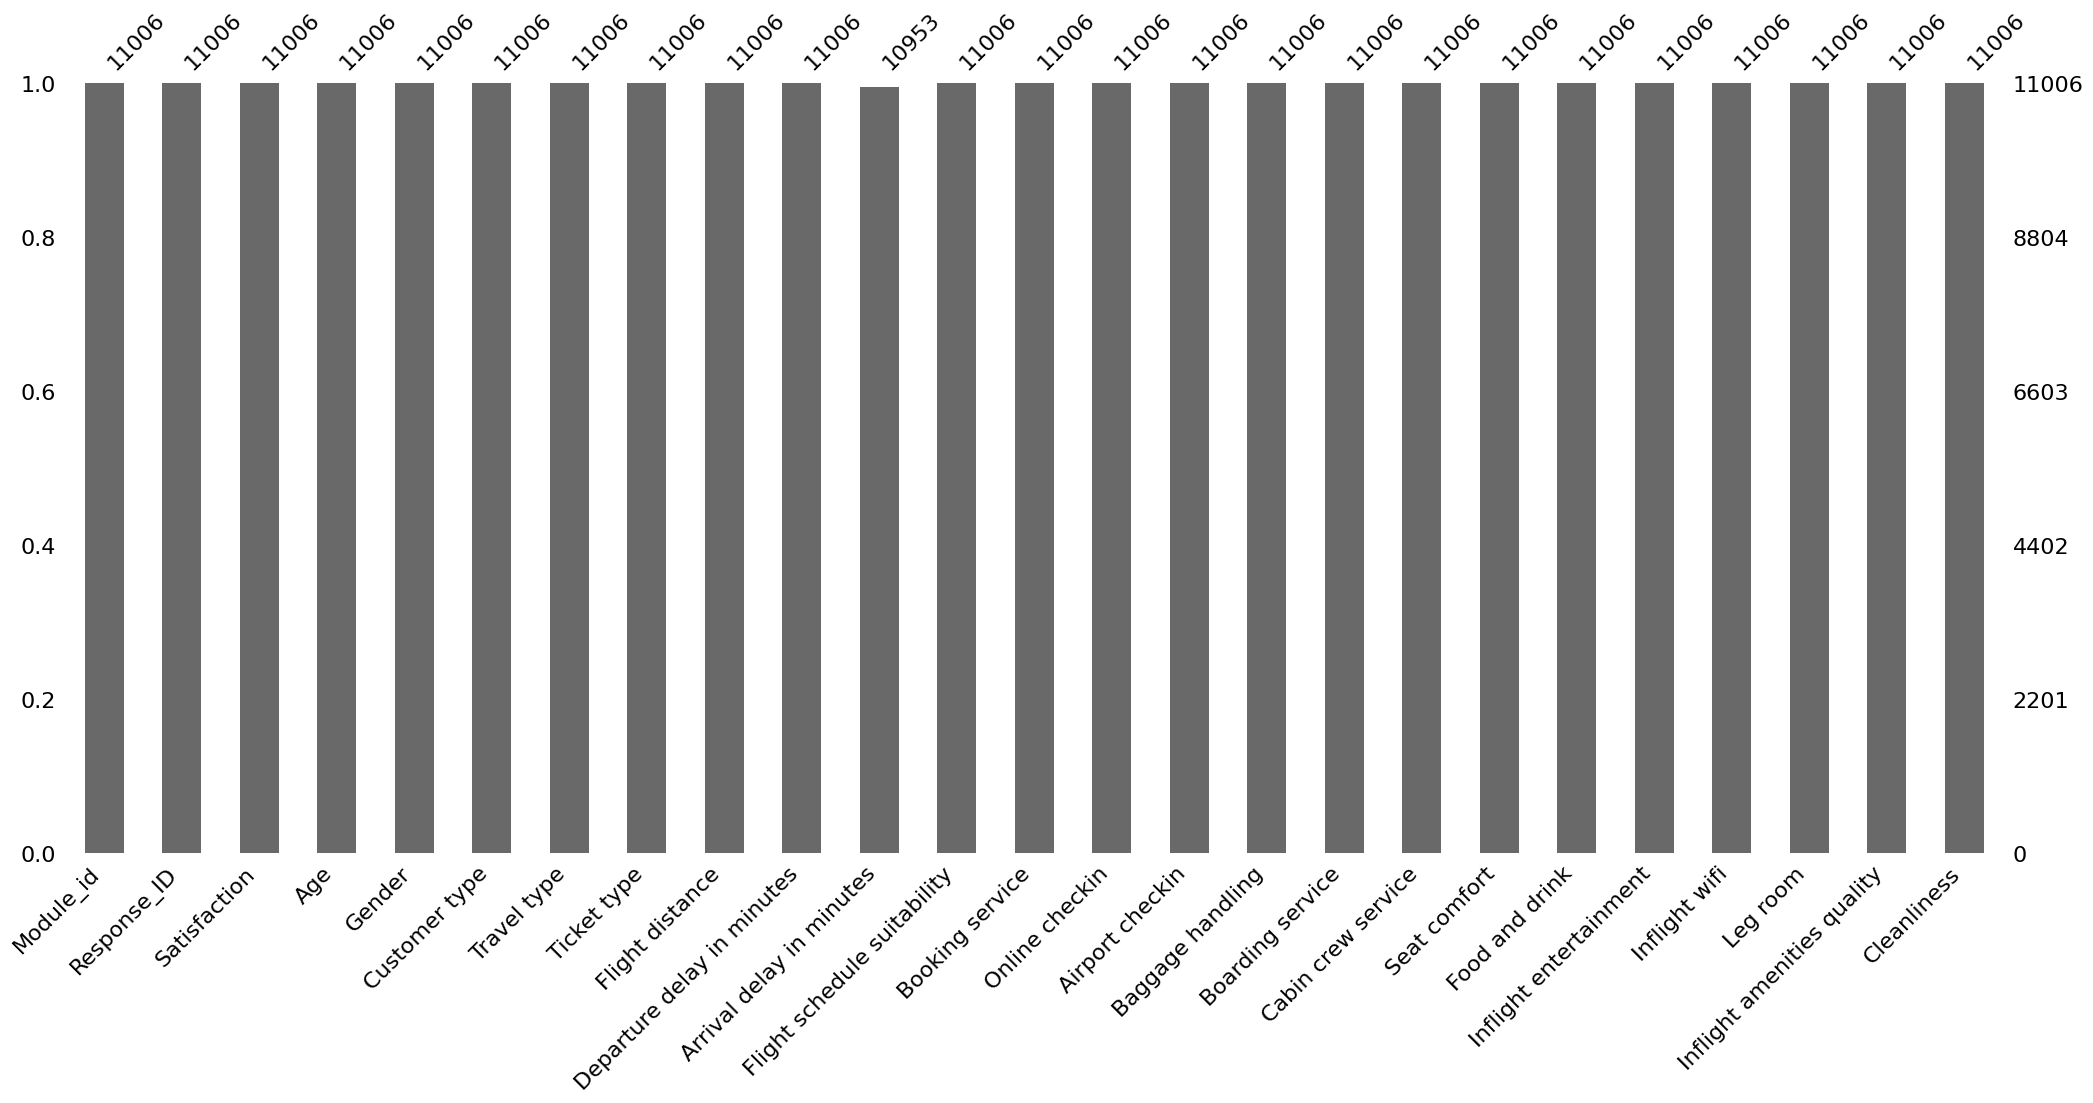

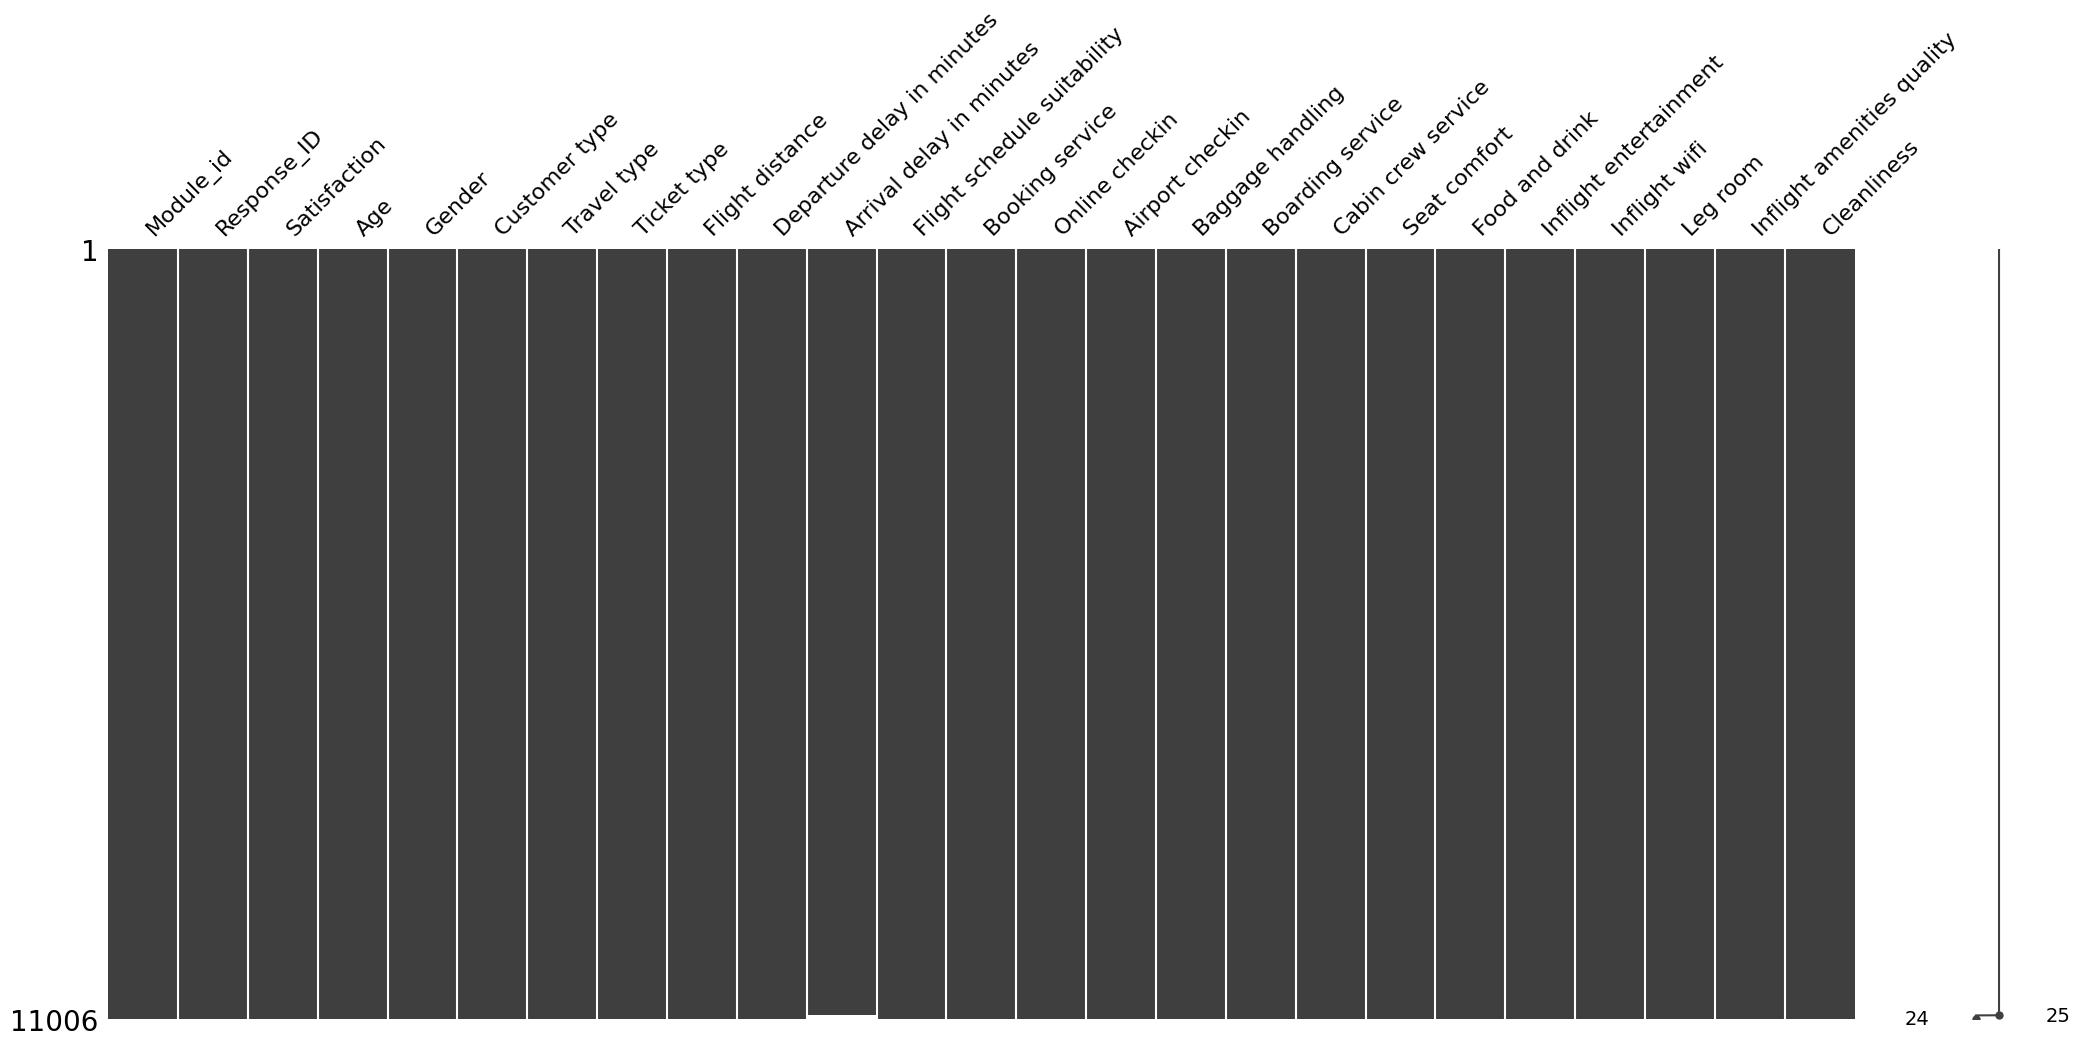

In [61]:
msno.bar(df);
msno.matrix(df);

None of the columns have Null values except "Arrival delay in minutes". And the metric says percentage of NUll values is just 0.52%, that means we can completely drop the null values. But we will decide on handling them going forward.



In [62]:
# Let's replace the Null values in the field "Arrival delay in minutes" with zero assuming that they were not delayed.
print(df['Arrival delay in minutes'].isna().sum())
data_cleaned = df.copy()
data_cleaned = data_cleaned.fillna(0)
data_cleaned['Arrival delay in minutes'].isna().sum()


53


0

In [63]:
# Let's drop the fields "Module_id" and "Response_id".
data_cleaned.drop(columns = ['Module_id', 'Response_ID'], axis = 1, inplace = True)
data_cleaned.columns
df=data_cleaned

**Univariate Analysis**

In [64]:
numerical=['Age','Flight distance','Departure delay in minutes','Arrival delay in minutes','Flight schedule suitability','Booking service','Online checkin','Airport checkin','Baggage handling','Boarding service','Cabin crew service','Seat comfort','Food and drink','Inflight entertainment','Inflight wifi','Leg room','Inflight amenities quality','Cleanliness']
categorical=['Satisfaction','Gender','Customer type','Travel type','Ticket type']



In [65]:

#Univariate Analysis

for cat in data_cleaned[categorical]:
    print (f'{round(df[cat].value_counts(normalize=True)*100,2)}')
    fig = px.histogram(df, x=cat, title=cat, width=300, height=350,histnorm='percent')
    fig.show()
    


Satisfaction
neutral or dissatisfied    56.61
satisfied                  43.39
Name: proportion, dtype: float64


Gender
Female    51.14
Male      48.86
Name: proportion, dtype: float64


Customer type
Loyal           81.63
Discontinued    18.37
Name: proportion, dtype: float64


Travel type
Business    68.96
Personal    31.04
Name: proportion, dtype: float64


Ticket type
Business        47.53
Economy         45.29
Economy Plus     7.18
Name: proportion, dtype: float64


In [66]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform binary feature
encoded_feature = label_encoder.fit_transform(df['Satisfaction'])

# Replace original binary feature with encoded numerical feature
df['Satisfaction'] = encoded_feature

**Bivariate Analysis**

In [67]:

#Travel type and Satisfaction

print (f'A customer with Business Travel type has a probability of {round(df[df["Travel type"]=="Business"]["Satisfaction"].mean()*100,2)} % to be satisfied')

print()

print (f'A customer with Business Travel type has a probability of  {round(df[df["Travel type"]=="Personal"]["Satisfaction"].mean()*100,2)} % to be satisfied')


fig = px.histogram(df, x="Travel type", color="Satisfaction",width=300, height=350)
fig.show()

A customer with Business Travel type has a probability of 58.09 % to be satisfied

A customer with Business Travel type has a probability of  10.74 % to be satisfied


More than 58% Buissness Customers are Satissfied while less than 12% Personal customers are disatissfied. The bussiness people are like 2 times the amont of buissness people.Therefore we can observe there is a relation ship between the travel type and satisfaction.

In [68]:
#Gender and Satisfaction
print (f'A Male customer has a probability of {round(df[df["Gender"]=="Male"]["Satisfaction"].mean()*100,2)} % to be satisfied')

print()

print (f'A Female Customer has a probability of  {round(df[df["Gender"]=="Female"]["Satisfaction"].mean()*100,2)} % to be satisfied')


fig = px.histogram(df, x="Gender", color="Satisfaction",width=300, height=350)
fig.show()

A Male customer has a probability of 43.64 % to be satisfied

A Female Customer has a probability of  43.16 % to be satisfied


The Male and Female has similar count and there is no significant difference between there satisfaction level.So we can tell that the gender along haven't any relationship with satisfaction level.

In [69]:
#Ticket type and Sattisfaction
print (f'A customer with Business ticket type has a probability of {round(df[df["Ticket type"]=="Business"]["Satisfaction"].mean()*100,2)} % to be satisfied')

print()

print (f'A customer with Economy ticket type has a probability of  {round(df[df["Ticket type"]=="Economy"]["Satisfaction"].mean()*100,2)} % to be satisfied')

print()

print (f'A customer with Economy Plus ticket type has a probability of  {round(df[df["Ticket type"]=="Economy Plus"]["Satisfaction"].mean()*100,2)} % to be satisfied')

fig = px.histogram(df, x="Ticket type", color="Satisfaction",width=300, height=320)
fig.show()


A customer with Business ticket type has a probability of 69.78 % to be satisfied

A customer with Economy ticket type has a probability of  18.72 % to be satisfied

A customer with Economy Plus ticket type has a probability of  24.43 % to be satisfied


Business ticket have a higher amount of getting sattisfied while economy people and economy plus ticket type are dissatissied mostly.

In [70]:
#Customer type and Sattisfaction
print (f'A Loyal customer has a probability of {round(df[df["Customer type"]=="Loyal"]["Satisfaction"].mean()*100,2)} % to be satisfied')

print()

print (f'A Discontinued customer has a probability of  {round(df[df["Customer type"]=="Discontinued"]["Satisfaction"].mean()*100,2)} % to be satisfied')


fig = px.histogram(df, x="Customer type", color="Satisfaction",width=300, height=350)
fig.show()

A Loyal customer has a probability of 47.81 % to be satisfied

A Discontinued customer has a probability of  23.79 % to be satisfied


**Metrics of importance**
* The degree of dependency between a categorical variable and the target variable can be measured by using mutual info score.
* Higher values of mutual information mean a higher degree of dependence.
* Higher the mutual info score implies that we can get the better prediction on the target variable.

In [71]:
from sklearn.metrics import mutual_info_score
def cat_mut_inf(series):
    return mutual_info_score(series, df['Satisfaction']) 

df_cat = df[categorical].apply(cat_mut_inf) 
df_cat = df_cat.sort_values(ascending=False).to_frame(name='mutual_info_score') 
df_cat

,mutual_info_score
Satisfaction,0.684395
Ticket type,0.134905
Travel type,0.109575
Customer type,0.018584
Gender,0.000012


As seen above, most of the categorical variables, almost no effect on the target variable.
Gender makes the least amount effect which we proved as in above bivariate Analysis between Gender and Satisfaction.

Customer type also have less amount of effect on the Satisfaction



**Correlation matrix**

In [72]:
df[numerical].corr()

,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
Age,1.000000,0.096741,-0.021270,-0.021375,0.049521,0.022645,0.215079,0.043680,-0.051604,0.008923,0.056922,0.166615,0.024563,0.069352,0.010697,0.034385,-0.054805,0.062603
Flight distance,0.096741,1.000000,-0.010370,-0.016446,-0.018069,0.060421,0.216234,0.077072,0.065979,0.009859,0.120376,0.152281,0.058906,0.131395,-0.000410,0.130871,0.071260,0.100556
Departure delay in minutes,-0.021270,-0.010370,1.000000,0.966225,0.001138,-0.001679,-0.022844,-0.008260,-0.006386,-0.002057,-0.034197,-0.018491,-0.027658,-0.020912,-0.012469,0.007388,-0.051320,-0.006649
Arrival delay in minutes,-0.021375,-0.016446,0.966225,1.000000,0.000365,-0.005452,-0.027245,-0.009384,-0.009428,-0.003675,-0.038482,-0.021559,-0.029484,-0.022295,-0.015344,0.003206,-0.053597,-0.007655
Flight schedule suitability,0.049521,-0.018069,0.001138,0.000365,1.000000,0.415564,0.049126,0.077717,0.069454,0.447725,0.055222,0.008110,-0.001954,-0.018358,0.314412,0.016771,0.057919,0.003021
Booking service,0.022645,0.060421,-0.001679,-0.005452,0.415564,1.000000,0.389330,0.002998,0.041765,0.453005,0.030066,0.012031,0.009772,0.017965,0.705842,0.105785,0.015214,-0.006158
Online checkin,0.215079,0.216234,-0.022844,-0.027245,0.049126,0.389330,1.000000,0.213980,0.087972,-0.000226,0.154758,0.413379,0.220294,0.272644,0.450790,0.107992,0.073906,0.321443
Airport checkin,0.043680,0.077072,-0.008260,-0.009384,0.077717,0.002998,0.213980,1.000000,0.236701,-0.032158,0.244445,0.200140,0.096589,0.141902,0.041055,0.155037,0.251195,0.189999
Baggage handling,-0.051604,0.065979,-0.006386,-0.009428,0.069454,0.041765,0.087972,0.236701,1.000000,0.010977,0.509173,0.072457,0.034548,0.385058,0.134690,0.364073,0.635396,0.107500
Boarding service,0.008923,0.009859,-0.002057,-0.003675,0.447725,0.453005,-0.000226,-0.032158,0.010977,1.000000,-0.028879,-0.004952,-0.009933,-0.011067,0.322782,-0.003904,-0.003714,-0.016628


There is very small positive correlation between numerical features.
Let' see their mean scores with the target variable

In [73]:
df.groupby('Satisfaction')[numerical].mean()

,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness
Satisfaction,,,,,,,,,,,,,,,,,,
0,37.279615,928.665169,16.796469,17.319904,3.145586,2.554896,2.652167,3.026324,3.356340,2.984430,3.008668,3.044302,2.956180,2.880417,2.367255,2.971750,3.365169,2.94061
1,41.627722,1537.579564,12.552554,12.525335,2.948911,3.008585,4.031407,3.665620,3.967546,2.944514,3.848199,3.956868,3.501884,3.957496,3.128141,3.817211,3.944095,3.73639


We can see the mean age value is 37 of dissatisfied and 41 of satisfied, travelers.But this age difference is not much differ so we can say less effect by the age of person

Mean value of flight distance is 928 of dissatisfied and 1537 of sattisfied which give meaning that long distance travelers are satisfied than short distance travelers.

Mean Departure delay of dissatisfied are greater(16 min) than the satisfied.Which is clear in sense that more the delay not working on time make the travelers dissatisfied.

Also mean Depature delay of dissatisfied is greater than(17min) than the satisfied travelers(16min).Travelers using flight will most probably come on time for their flights so delay time can cause them to be dissatisfied.




**Correlation of Features with Target Variable**

In [74]:
#Correlation Matrix 
df[numerical+['Satisfaction']].corr()



,Age,Flight distance,Departure delay in minutes,Arrival delay in minutes,Flight schedule suitability,Booking service,Online checkin,Airport checkin,Baggage handling,Boarding service,Cabin crew service,Seat comfort,Food and drink,Inflight entertainment,Inflight wifi,Leg room,Inflight amenities quality,Cleanliness,Satisfaction
Age,1.000000,0.096741,-0.021270,-0.021375,0.049521,0.022645,0.215079,0.043680,-0.051604,0.008923,0.056922,0.166615,0.024563,0.069352,0.010697,0.034385,-0.054805,0.062603,0.143124
Flight distance,0.096741,1.000000,-0.010370,-0.016446,-0.018069,0.060421,0.216234,0.077072,0.065979,0.009859,0.120376,0.152281,0.058906,0.131395,-0.000410,0.130871,0.071260,0.100556,0.302512
Departure delay in minutes,-0.021270,-0.010370,1.000000,0.966225,0.001138,-0.001679,-0.022844,-0.008260,-0.006386,-0.002057,-0.034197,-0.018491,-0.027658,-0.020912,-0.012469,0.007388,-0.051320,-0.006649,-0.052072
Arrival delay in minutes,-0.021375,-0.016446,0.966225,1.000000,0.000365,-0.005452,-0.027245,-0.009384,-0.009428,-0.003675,-0.038482,-0.021559,-0.029484,-0.022295,-0.015344,0.003206,-0.053597,-0.007655,-0.058283
Flight schedule suitability,0.049521,-0.018069,0.001138,0.000365,1.000000,0.415564,0.049126,0.077717,0.069454,0.447725,0.055222,0.008110,-0.001954,-0.018358,0.314412,0.016771,0.057919,0.003021,-0.063715
Booking service,0.022645,0.060421,-0.001679,-0.005452,0.415564,1.000000,0.389330,0.002998,0.041765,0.453005,0.030066,0.012031,0.009772,0.017965,0.705842,0.105785,0.015214,-0.006158,0.160552
Online checkin,0.215079,0.216234,-0.022844,-0.027245,0.049126,0.389330,1.000000,0.213980,0.087972,-0.000226,0.154758,0.413379,0.220294,0.272644,0.450790,0.107992,0.073906,0.321443,0.505836
Airport checkin,0.043680,0.077072,-0.008260,-0.009384,0.077717,0.002998,0.213980,1.000000,0.236701,-0.032158,0.244445,0.200140,0.096589,0.141902,0.041055,0.155037,0.251195,0.189999,0.248925
Baggage handling,-0.051604,0.065979,-0.006386,-0.009428,0.069454,0.041765,0.087972,0.236701,1.000000,0.010977,0.509173,0.072457,0.034548,0.385058,0.134690,0.364073,0.635396,0.107500,0.254875
Boarding service,0.008923,0.009859,-0.002057,-0.003675,0.447725,0.453005,-0.000226,-0.032158,0.010977,1.000000,-0.028879,-0.004952,-0.009933,-0.011067,0.322782,-0.003904,-0.003714,-0.016628,-0.015607


Consider correlation of numerical variables with target variables convert the categorical feature to numerical as sattisfied:1's and dissatisfie:0's

As we can see a positive correlation between Satisfaction and travel distance and above mean value of distance travel there is a possibility that the higher distance is sattisfied than short distance.

Depature delay give negative correlation wich means increase the delay there is a possibility to people get dissatisfied.But there is a stong correlation between depature delay and arrival delay even though they seperately show a weak negative correlation when and mean values of the sattisfied and dissatisfied people have similar values since they are correlate together both of them will together give a chance of dissatisfaction of a traveler with the increment.

Flight suitability also give a negative correlation but not higher 

Online chekin  have a good correlation with Satisfaction more the online booking increase higher the possibility to get a traveller sattisfied due to some reasons.

Inflight entertatintement also give a signifificant correlation with sattisfaction as the mean value of sattisfied have higher value of Inflight entertainment higher the entertainment will increase the possibility of traveler to be satisfied.

Other factor have a correlation values between 2-3 which they will also affect the possibility of traveller to get sattisfied with the increase.

There is a good correlation between Cleaniness And Food and drinks
                                    Cleanliness and legroom
                                    Cleanliness and seat comfort
                                    Seat comfort and Food and drinks
                                    




In [75]:
# Let's start with LabelEncoder.
encoded_data = df.copy()
cols_to_encode = ['Gender', 'Customer type', 'Travel type','Ticket type'] #Satisfaction has already encoded
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encoded_data[cols_to_encode] = df[cols_to_encode].apply(le.fit_transform)

In [76]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11006 entries, 0 to 11005
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Satisfaction                 11006 non-null  int64  
 1   Age                          11006 non-null  int64  
 2   Gender                       11006 non-null  int64  
 3   Customer type                11006 non-null  int64  
 4   Travel type                  11006 non-null  int64  
 5   Ticket type                  11006 non-null  int64  
 6   Flight distance              11006 non-null  int64  
 7   Departure delay in minutes   11006 non-null  int64  
 8   Arrival delay in minutes     11006 non-null  float64
 9   Flight schedule suitability  11006 non-null  int64  
 10  Booking service              11006 non-null  int64  
 11  Online checkin               11006 non-null  int64  
 12  Airport checkin              11006 non-null  int64  
 13  Baggage handling

In [77]:
# Let's rearrange the columns in the dataset so that the dependent variable in the last column.
cols = [col for col in encoded_data if col != 'Satisfaction'] + ['Satisfaction']
encoded_data = encoded_data[cols]

In [78]:
# Let's separate the dependent and independent variables.
X = encoded_data.iloc[:, :-1].values

y = encoded_data.iloc[:, -1].values
print('Shape of X: ', X.shape)
print('Shape of y: ', y.shape)

Shape of X:  (11006, 22)
Shape of y:  (11006,)


In [79]:
# Let's split the data set into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print('Shape of X_train: ', X_train.shape)
print('Shape of X_test: ', X_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape)

Shape of X_train:  (8804, 22)
Shape of X_test:  (2202, 22)
Shape of y_train:  (8804,)
Shape of y_test:  (2202,)


In [80]:
# Let's standardise the columns.
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:-1] = sc.fit_transform(X_train[:, 3:-1])
X_test[:, 3:-1] = sc.transform(X_test[:, 3:-1])

**Model Implementation**

In [81]:
# Creating the LogisticRegression model
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train,y_train)

# Predicting the output for test dataset
y_pred = lr_classifier.predict(X_test)

# Lets measure the accuracy of the model using the confusion matrix and accruacy score.
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

corr_pred = cm[0, 0] + cm[1, 1]
total = cm.sum()
corr_pred_per_lr = round(corr_pred/total*100, 2)
print('Percentage of correct predictions: ', corr_pred_per_lr)

Percentage of correct predictions:  87.42
